# DIG Final Project

## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Gabriella Bulli**: You know, blowing up things and such.
- **Deborah Chen**: Cleverly sneaking into small spaces
- **Isha Tripuraneni**: AKA The "Muscle"

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

 Does high expression of Alzheimer’s risk genes—namely APOE and PICALM—correlate with measures of neural activity, such as EEG activity, along with any differences in cognitive function, such as memory, intelligence, mood, and personality?

# Background and Prior Work

Alzheimer’s disease (AD) is a neurodegenerative disorder with increased prevalence in elders. It is the most prevalent form of dementia, accounting for more than half of the cases. It causes cognitive decline shown by memory loss and drastic mood changes. While there isn’t a current cure for AD, much research has gone into characterizing the pathology of and risk factors for AD. Among the contributing factors to AD are genetics, epigenetics, and environment, with over 600 AD-associated genes identified (Bertram et al., 2007).   

Electroencephalography (EEG) is a common non-invasive technique that measures brain activity from the scalp (Maturana-Candelas et al., 2019). AD patients have shown a significantly slower EEG. Further, their theta band frequencies are disrupted, corresponding to rodent studies (Macedo et al., 2021). Theta oscillations generally function to support spatial memory and navigation. fMRI is also useful for studying neurodegeneration to view functional connectivity across brain regions by measuring the correlation of blood oxygenation level-dependent (BOLD) time activations in various regions of the brain (Dennis et al., 2014). fMRI can visualize brain activity during working memory, attention, and motor tasks. Taken together, EEG and fMRI can explore the temporal and spatial effects AD may have on brain activity (Aramadaka et al., 2023).   

The apolipoprotein E (APOE) ɛ4 allele is one of the major AD genetic risk factors. APOE ɛ4 fragmentation leads to Amyloid-beta (Aβ) plaque formation, which plays a role in AD progression (Muñoz et al., 2019). Different brain regions all show a noticeable increase in complexity patterns recorded via EEG for individuals with APOE ɛ4 allele, which can be associated with neural degeneration (Gutiérrez-de Pablo et al., 2020). Another AD-associated factor is phosphatidylinositol binding clathrin-assembly protein (PICALM), which plays an important role in clathrin-mediated processes, including endocytosis during molecular signaling. Furthermore, PICALM risk alleles may disrupt the Aβ clearance mechanism (Ando et al., 2020). Maturana-Candelas et al. (2021) analyzed PICALM variants' effects on EEG activity and found that certain PICALM risk alleles were associated with disrupted beta power, which can describe cognitive processes that are often disrupted by Aβ plaque formation and the pathology of AD.

We will use the PEARL-Neuro database, which contains multiple data modalities. The database collected genetic, demographic and health, and psychometric data from 192 participants. In stage 2 of the experiment, they collected neuroimaging data—EEG and fMRI—and blood test data from 79 of the participants who demonstrated AD susceptibility.

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [1]:
## YOUR CODE HERE
!pip install mne

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.4 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.2 MB/s  eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
import urllib.request
import os 
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
http_link = "https://s3.amazonaws.com/openneuro.org/ds004796/"
participants_http = "https://s3.amazonaws.com/openneuro.org/ds004796/participants.tsv"
urllib.request.urlretrieve(participants_http, "participants.tsv")

('participants.tsv', <http.client.HTTPMessage at 0x7f296385b610>)

In [43]:
participants_df = pd.read_csv('participants.tsv', delimiter='\t')
participants_df.head()

,participant_id,second_phase,session_order,APOE_rs429358,APOE_rs7412,APOE_haplotype,PICALM_rs3851179,age,sex,education,...,lymphocytes_%,monocytes_%,eosinophils_%,basophils_%,total_cholesterol,cholesterol_HDL,non-HDL_cholesterol,LDL_cholesterol,triglycerides,HSV_r
0,sub-01,1,1.0,T/T,C/C,e3/e3,A/A,59,0,3.0,...,26.6,10.4,0.8,0.3,174.3,37.9,136.4,100.48,179.6,1.0
1,sub-02,1,1.0,T/T,C/C,e3/e3,G/A,56,0,3.0,...,30.9,12.2,2.9,1.6,163.4,46.1,117.3,84.56,163.7,1.0
2,sub-03,1,0.0,T/T,C/C,e3/e3,G/A,52,0,3.0,...,36.1,9.0,2.1,0.6,152.9,43.3,109.6,100.88,43.6,1.0
3,sub-04,1,0.0,T/T,C/C,e3/e3,A/A,52,1,3.0,...,35.5,12.1,1.8,0.8,253.8,83.2,170.6,154.30,81.5,0.0
4,sub-05,1,0.0,T/T,C/C,e3/e3,G/A,52,1,3.0,...,32.9,8.1,1.2,0.9,283.1,66.1,217.0,188.28,143.6,1.0


In [4]:
msit_eeg_http = "https://s3.amazonaws.com/openneuro.org/ds004796/sub-01/eeg/sub-01_task-msit_eeg.eeg"
msit_eeg_filename = "sub-01_task-msit_eeg.eeg"
mist_vhdr_http = "https://s3.amazonaws.com/openneuro.org/ds004796/sub-01/eeg/sub-01_task-msit_eeg.vhdr"
urllib.request.urlretrieve(msit_eeg_http, msit_eeg_filename)
urllib.request.urlretrieve(msit_eeg_http, "sub-01_task-msit_eeg.vhdr")

('sub-01_task-msit_eeg.eeg', <http.client.HTTPMessage at 0x7f2ae7cac490>)

In [10]:
msit_vhdr_http = "https://s3.amazonaws.com/openneuro.org/ds004796/sub-01/eeg/sub-01_task-msit_eeg.vhdr"
urllib.request.urlretrieve(msit_vhdr_http, "sub-01_task-msit_eeg.vhdr")

('sub-01_task-msit_eeg.vhdr', <http.client.HTTPMessage at 0x7f2ae442cb80>)

In [13]:
msit_vmrk_http = "https://s3.amazonaws.com/openneuro.org/ds004796/sub-01/eeg/sub-01_task-msit_eeg.vmrk"
urllib.request.urlretrieve(msit_vmrk_http, "sub-01_task-msit_eeg.vmrk")

('sub-01_task-msit_eeg.vmrk', <http.client.HTTPMessage at 0x7f2964669610>)

In [14]:
raw = mne.io.read_raw_brainvision('sub-01_task-msit_eeg.vhdr', preload=True)

Extracting parameters from sub-01_task-msit_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 608739  =      0.000 ...   608.739 secs...


Using matplotlib as 2D backend.


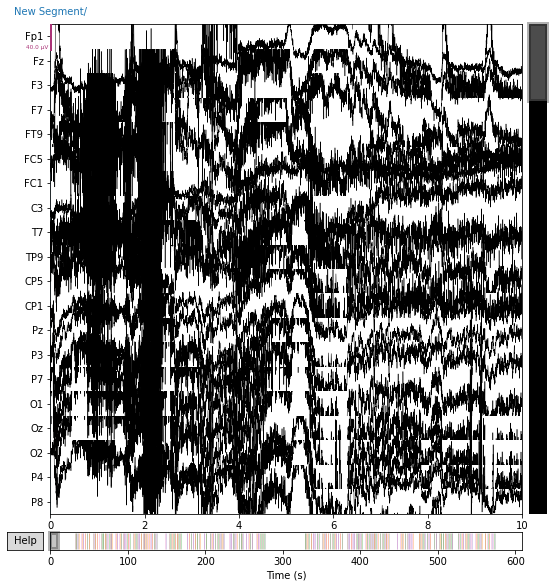

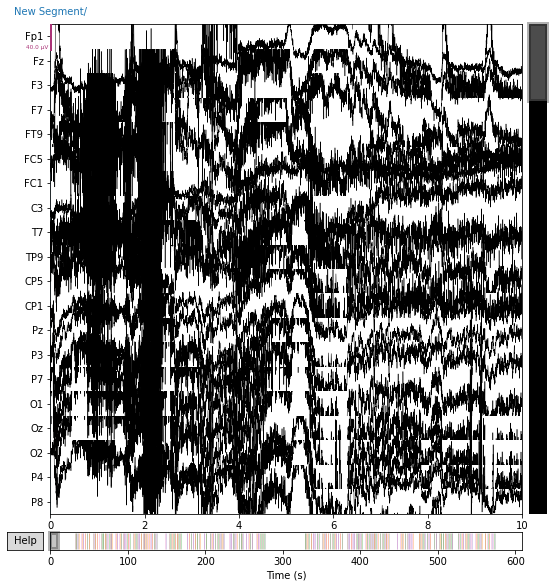

In [15]:
raw.plot()

In [23]:
# Extract events from annotations
events, event_dict = mne.events_from_annotations(raw)

event_dict

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S 10']


{'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4,
 'Stimulus/S  5': 5,
 'Stimulus/S 10': 10}

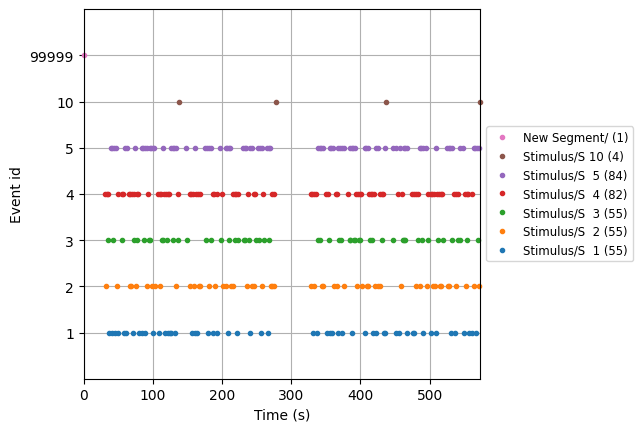

In [27]:
fig = mne.viz.plot_events(
    events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp, event_id=event_dict
)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_182/2847632005.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()


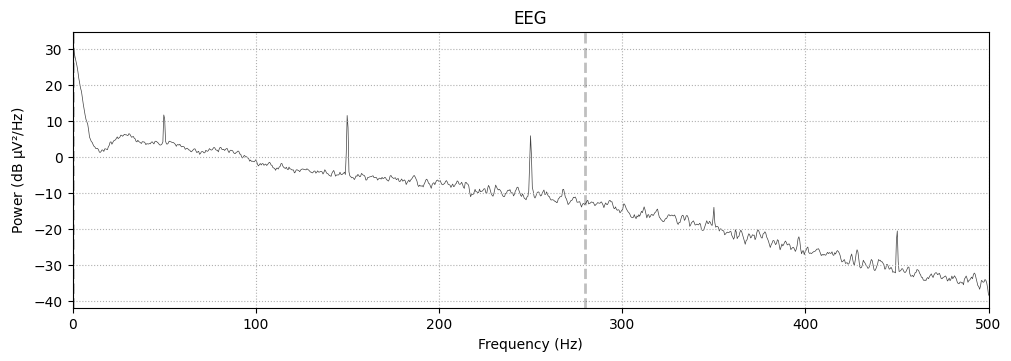

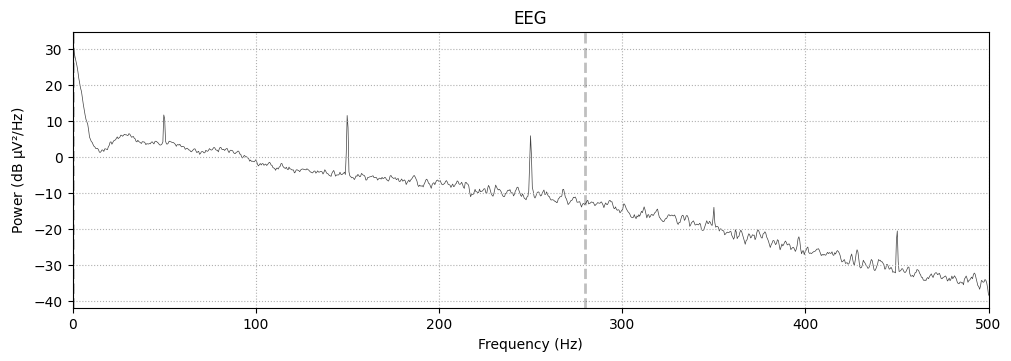

In [39]:
raw.plot_psd()

# Data Wrangling

Describe your data wrangling steps here.

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Conclusion & Discussion

*Fill in your discussion information here*